In [1]:
import numpy as np
import pandas as pd
import sklearn
X = pd.read_csv("train.csv")


In [2]:
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape

(42000, 785)

In [4]:
X_train = X.iloc[:,1:]
y_train = X.iloc[:,0]

In [5]:
X_train, y_train

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

In [6]:
from sklearn.model_selection import ShuffleSplit
data = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# data.get_n_splits(X)
for train_index, test_index in data.split(X_train):
    print("Train:", train_index, "test:",test_index)

Train: [39317 32837 16644 ... 30403 21243  2732] test: [16275 19204 18518 ... 26193 26564 27420]


In [7]:
train_index.shape, test_index.shape

((33600,), (8400,))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cnnimg = plt.imread('test.png')
print("shape of cnnimg", cnnimg.shape)

shape of cnnimg (856, 1530, 4)


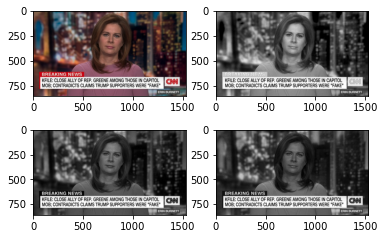

In [82]:
fig = plt.figure()
a = fig.add_subplot(2,2,1)
imgplot = plt.imshow(cnnimg)
a = fig.add_subplot(2,2,2)
imgplot = plt.imshow(cnnimg[:,:,0],cmap='gray')
a = fig.add_subplot(2,2,3)
imgplot = plt.imshow(cnnimg[:,:,1],cmap='gray')
a = fig.add_subplot(2,2,4)
imgplot = plt.imshow(cnnimg[:,:,2],cmap='gray')



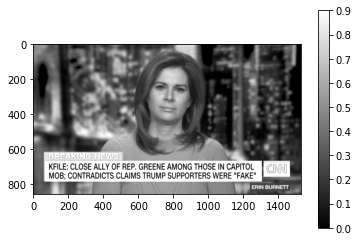

In [74]:
imgplot = plt.imshow(cnnimg[:,:,0],cmap="gray",clim=(0,0.9))
plt.colorbar()

In [68]:
#plt.hist(cnnimg[:,:,0:3].ravel(),bins=256,density=True,cumulative=False,histtype='step',orientation='vertical',log=True)

In [32]:
X_train.shape

(42000, 784)

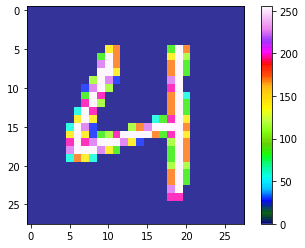

In [90]:
digits_data = X_train.to_numpy().reshape(-1,28,28)
imgplot = plt.imshow(digits_data[205],cmap='gist_ncar',alpha=0.8)
plt.colorbar()

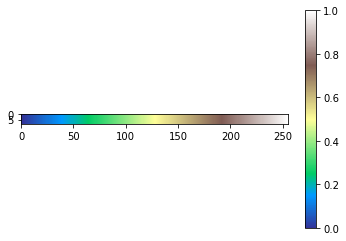

In [88]:
height = 10
width = 256
band = [[j/(width-1) for j in range(0,width)] for i in range(0,height)]
imgplot = plt.imshow(band, cmap = 'terrain')
plt.colorbar()

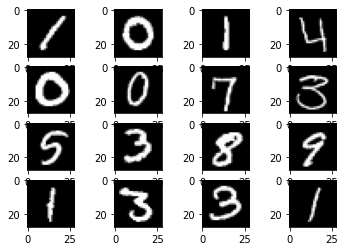

In [102]:
import matplotlib.figure as figure
digimg = X_train.to_numpy().reshape(-1,28,28)
fig = plt.figure()
figure.SubplotParams(wspace=30,hspace=15)
x_nums = 4
y_nums = 4
for i in range(0,x_nums):
    for j in range(0,y_nums):
        seq = i*y_nums+j
        a = fig.add_subplot(x_nums,y_nums,seq+1)
        imgplot = plt.imshow(digimg[seq],cmap='gray')